# Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import pydot

# Load and Resize the data

In [6]:
#load_dataset function to load the data and resize the images to 50x50
def load_dataset(directory):
  images = []
  labels = []
  for idx, label in enumerate(uniq_labels):
    for file in os.listdir(directory + '/'+label):
      filepath = directory +'/'+ label + "/" + file
      img = cv2.resize(cv2.imread(filepath),(50,50))
      images.append(img)
      labels.append(idx)
  images = np.asarray(images)
  labels = np.asarray(labels)
  return images, labels

# Display the images

In [7]:
#display_images function to show examples
def display_images(x_data,y_data, title, display_label = True):
    x, y = x_data,y_data
    fig, axes = plt.subplots(5, 8, figsize = (18, 5))
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    fig.suptitle(title, fontsize = 18)
    for i, ax in enumerate(axes.flat):
        ax.imshow(cv2.cvtColor(x[i], cv2.COLOR_BGR2RGB))
        if display_label:
            ax.set_xlabel(uniq_labels[y[i]])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

# Load the data 

In [8]:
#loading_dataset into X_pre and Y_pre
data_dir = "D:/Drone/hands data normal"
uniq_labels = sorted(os.listdir(data_dir))
X_pre, Y_pre = load_dataset(data_dir)
print(X_pre.shape, Y_pre.shape)

(18000, 50, 50, 3) (18000,)


# Split the data

In [15]:
#spliting dataset into 80% train, 10% validation and 10% test data
X_train, X_test, Y_train, Y_test = train_test_split(X_pre, Y_pre, train_size = 0.8)
X_test, X_eval, Y_test, Y_eval = train_test_split(X_test, Y_test, test_size = 0.5)

In [16]:
%matplotlib notebook

Train images shape (14400, 50, 50, 3) (14400,)
Test images shape (1800, 50, 50, 3) (1800,)
Evaluate image shape (1800, 50, 50, 3) (1800,)
Printing the labels ['A', 'B', 'C', 'F', 'K', 'Y'] 6


<IPython.core.display.Javascript object>


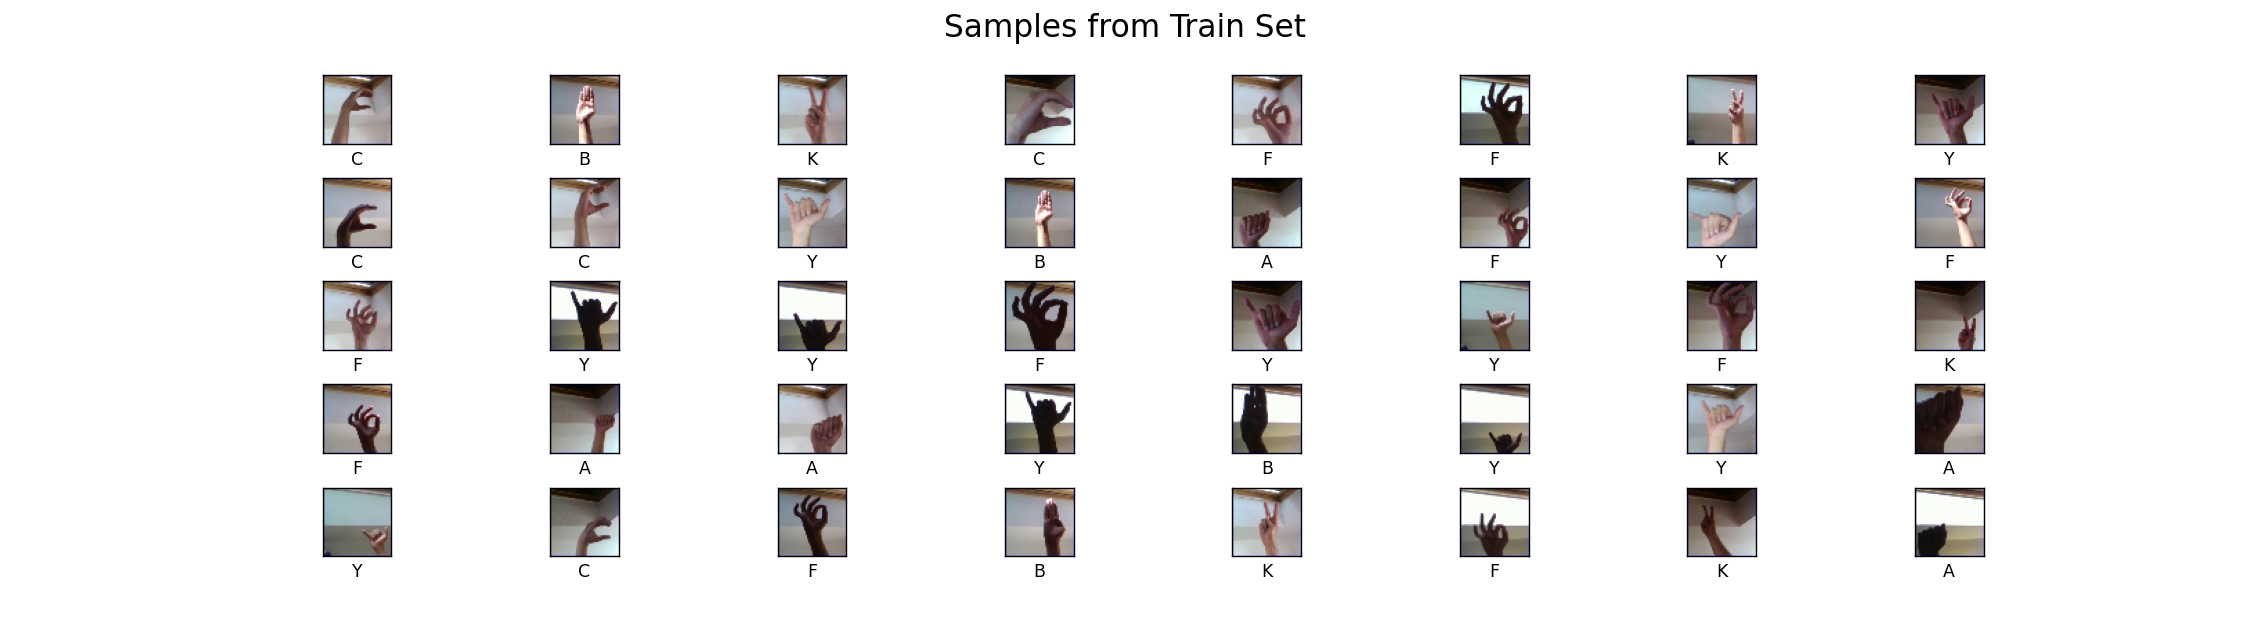

<IPython.core.display.Javascript object>


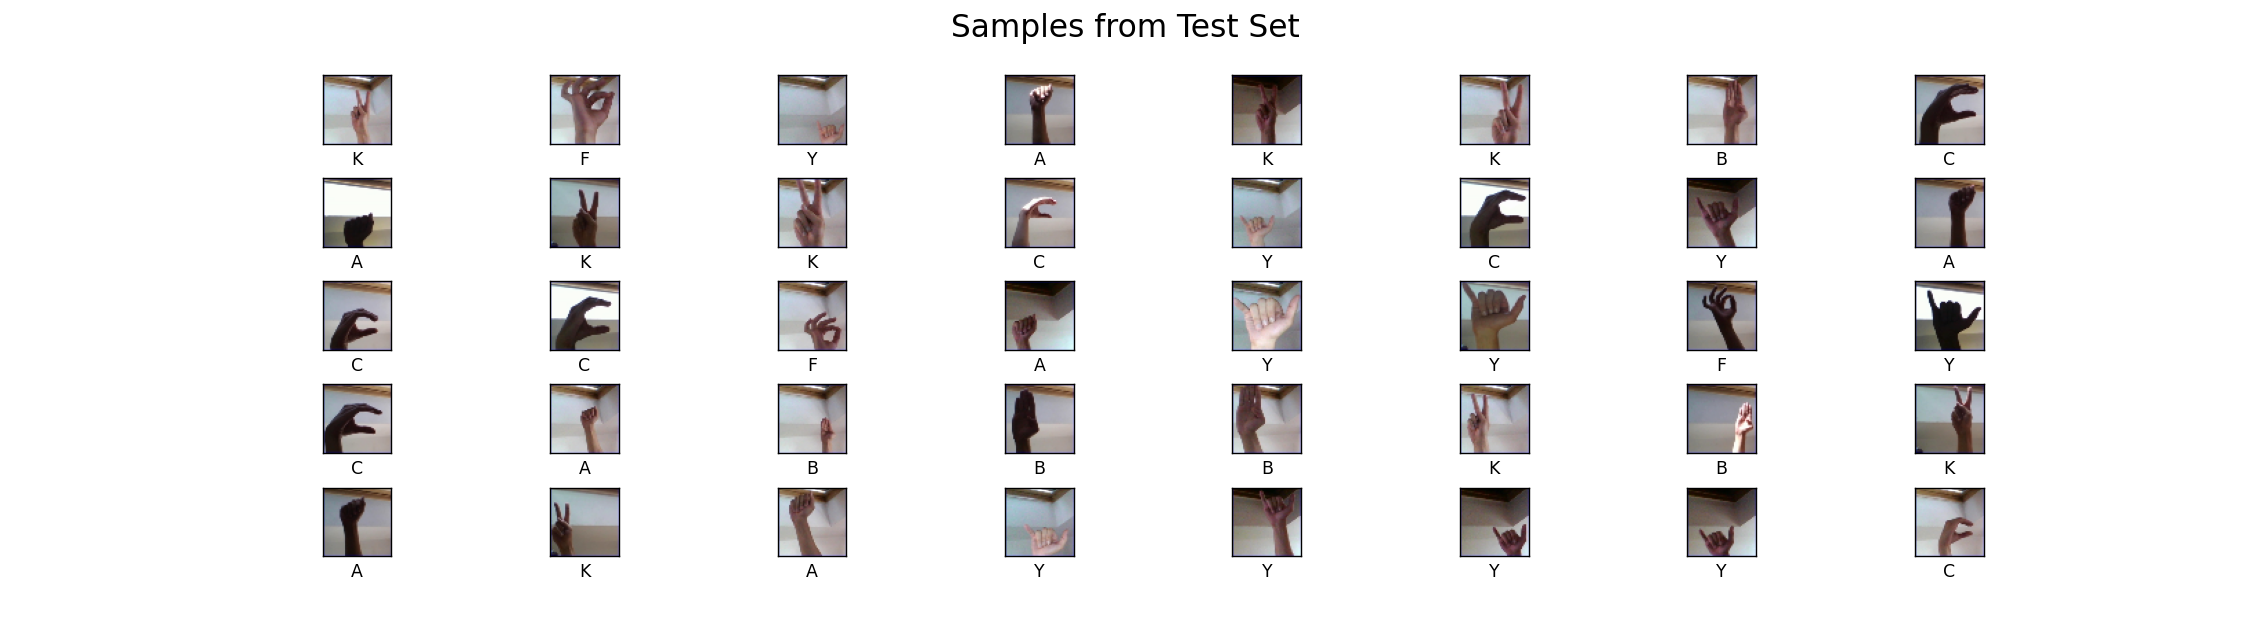

<IPython.core.display.Javascript object>


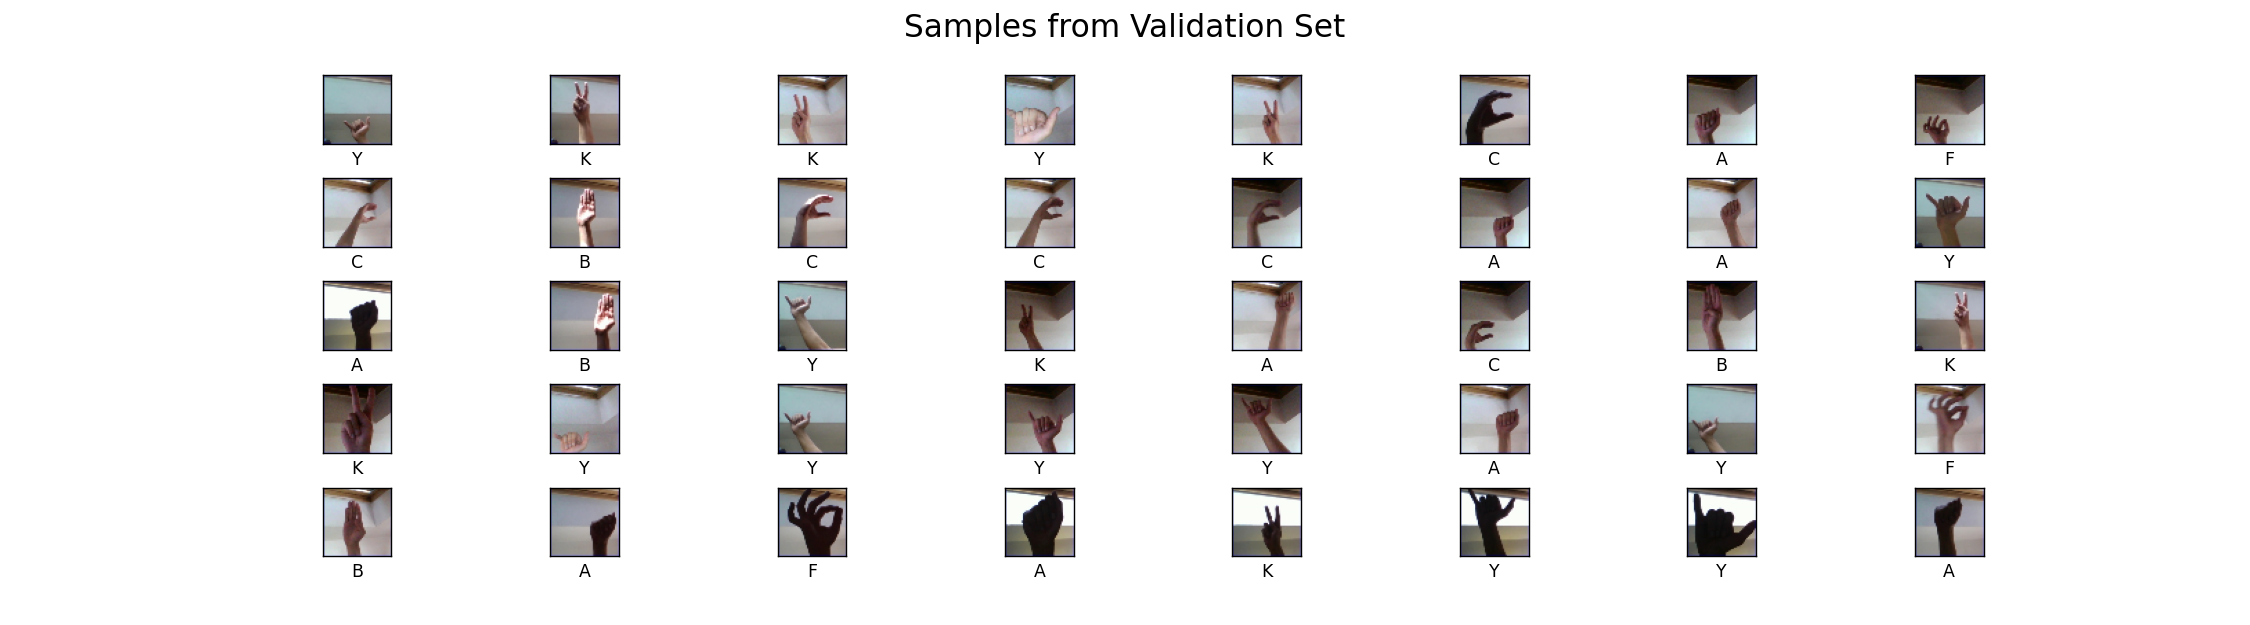

In [17]:
#print shapes and show examples for each set
print("Train images shape",X_train.shape, Y_train.shape)
print("Test images shape",X_test.shape, Y_test.shape)
print("Evaluate image shape",X_eval.shape, Y_eval.shape)
print("Printing the labels",uniq_labels, len(uniq_labels))
display_images(X_train,Y_train,'Samples from Train Set')
display_images(X_test,Y_test,'Samples from Test Set')
display_images(X_eval,Y_eval,'Samples from Validation Set')

# Normalize the data 

In [18]:
# converting Y_tes and Y_train to One hot vectors using to_categorical
# example of one hot => '1' is represented as [0. 1. 0. . . . . 0.]
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_eval = to_categorical(Y_eval)
X_train = X_train / 255.
X_test = X_test/ 255.
X_eval = X_eval/ 255.

# Build the Model

In [19]:
# building our model
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu', input_shape=(50,50,3)),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(16, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 16)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        9248      
                                                      

In [20]:
#compiling the model
#default batch size 32
#default learning rate is 0.001
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'],)

In [21]:
#start training(fitting) the data
history = model.fit(X_train, Y_train, epochs=20, verbose=1,
                validation_data=(X_eval, Y_eval))

Epoch 1/20


450/450 [==============================] - 13s 19ms/step - loss: 0.8354 - accuracy: 0.6639 - val_loss: 0.1823 - val_accuracy: 0.9222
Epoch 2/20
450/450 [==============================] - 8s 18ms/step - loss: 0.1225 - accuracy: 0.9590 - val_loss: 0.0497 - val_accuracy: 0.9850
Epoch 3/20
450/450 [==============================] - 8s 17ms/step - loss: 0.0567 - accuracy: 0.9829 - val_loss: 0.0621 - val_accuracy: 0.9778
Epoch 4/20
450/450 [==============================] - 8s 17ms/step - loss: 0.0352 - accuracy: 0.9890 - val_loss: 0.0055 - val_accuracy: 0.9994
Epoch 5/20
450/450 [==============================] - 7s 16ms/step - loss: 0.0248 - accuracy: 0.9932 - val_loss: 0.0454 - val_accuracy: 0.9833
Epoch 6/20
450/450 [==============================] - 7s 17ms/step - loss: 0.0342 - accuracy: 0.9899 - val_loss: 0.0039 - val_accuracy: 0.9989
Epoch 7/20
450/450 [==============================] - 8s 17ms/step - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.0092 - val_accuracy: 0.9

# Save the Model

In [22]:
#save the model
model.save('model01_cnn.h5')

C:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Plot the Accuracy & Loss 

In [30]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

<IPython.core.display.Javascript object>


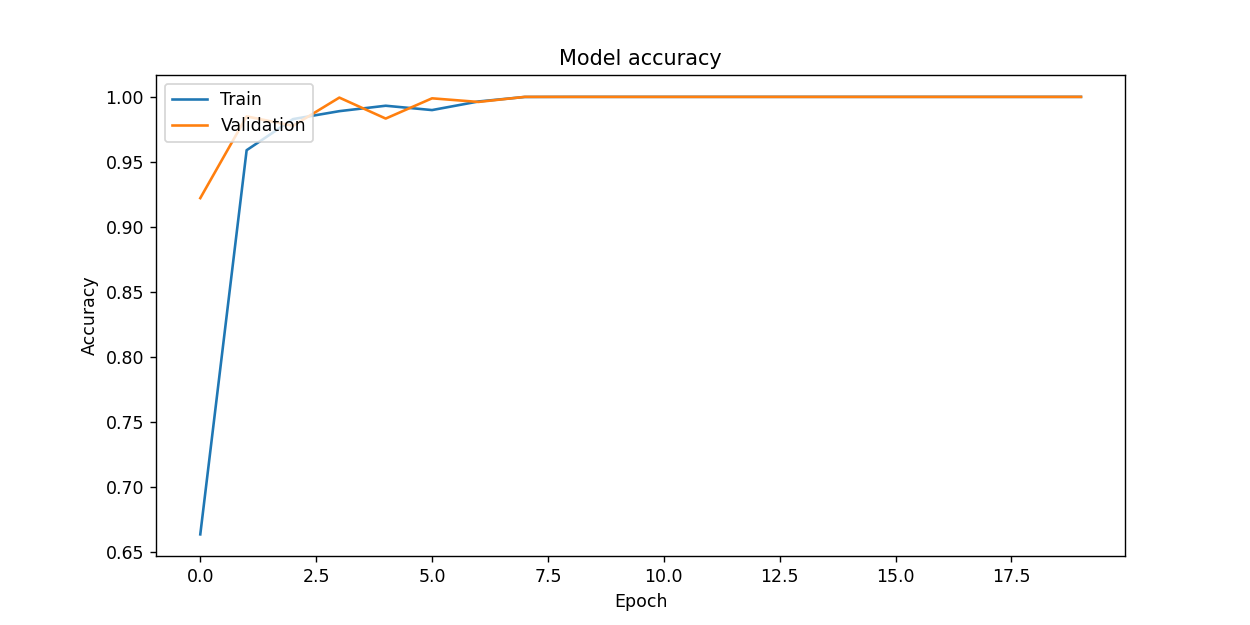

<IPython.core.display.Javascript object>


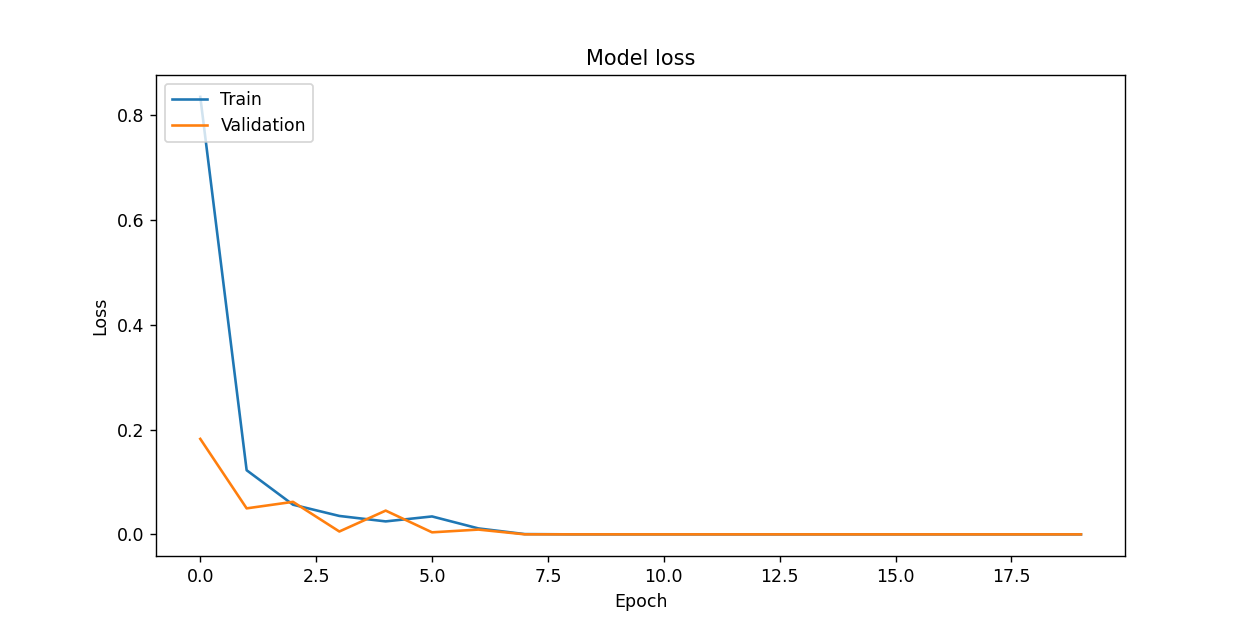

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Confusion Matrix

57/57 [==============================] - 1s 6ms/step


<IPython.core.display.Javascript object>


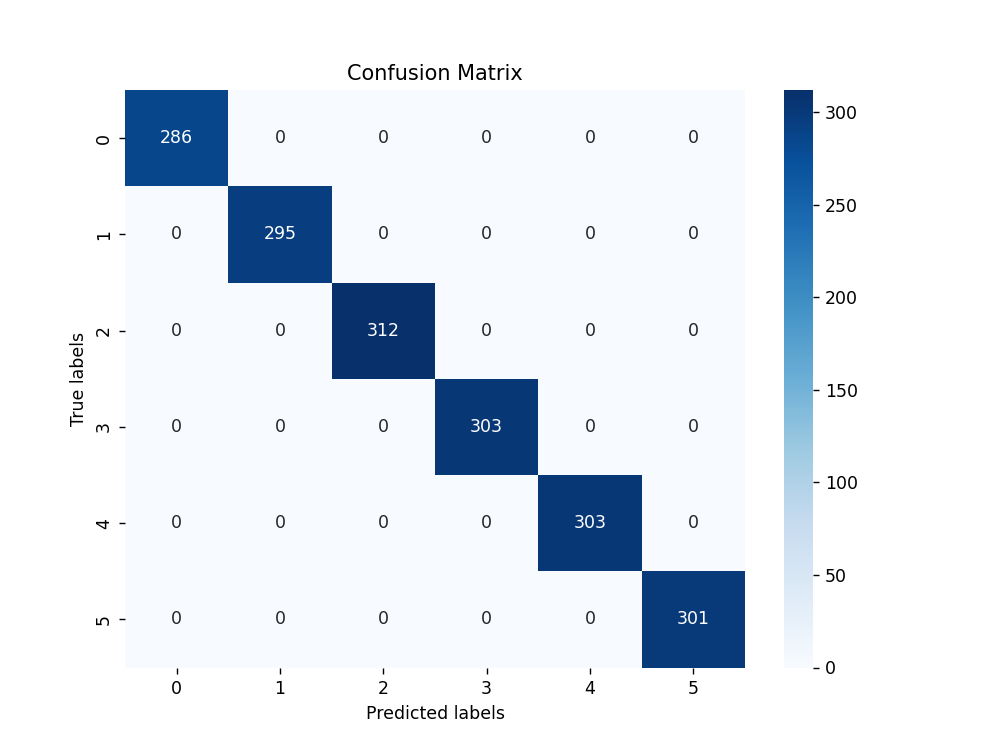

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted probabilities for each class
Y_pred_probs = model.predict(X_eval)

# Get the predicted class indices
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(np.argmax(Y_eval, axis=1), Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()